In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
df1=pd.read_csv('Testing.csv')
df1

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma



Removing Redundant feature


In [4]:
df.drop(['Unnamed: 133'],axis=1,inplace=True)
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
df1_x=df1.drop(['prognosis'],axis=1)
X1 = df1_x
X1

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_y1=df1['prognosis']
df_y1

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

checking for null values

In [7]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
df.isnull().values.any()

False

We can conclude that there are no null values in the data to deal with hence we can skip data cleaning part and proceed to feature engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
print("There are "+str(len(df["prognosis"].unique()))+" unique types of diseases considered in this project")

There are 41 unique types of diseases considered in this project


We can infer that the data contains 132 feature attributes corresponding to each patient. These attributes are binary in nature and are stored as int64 datatype. 133rd row corresponds to disease that the symptoms corresponds to. The name of the disease is stored as object data type. There are 4920 rows, which means data contains of 132 features corresponding to particular case and disease.

<AxesSubplot:xlabel='count', ylabel='prognosis'>

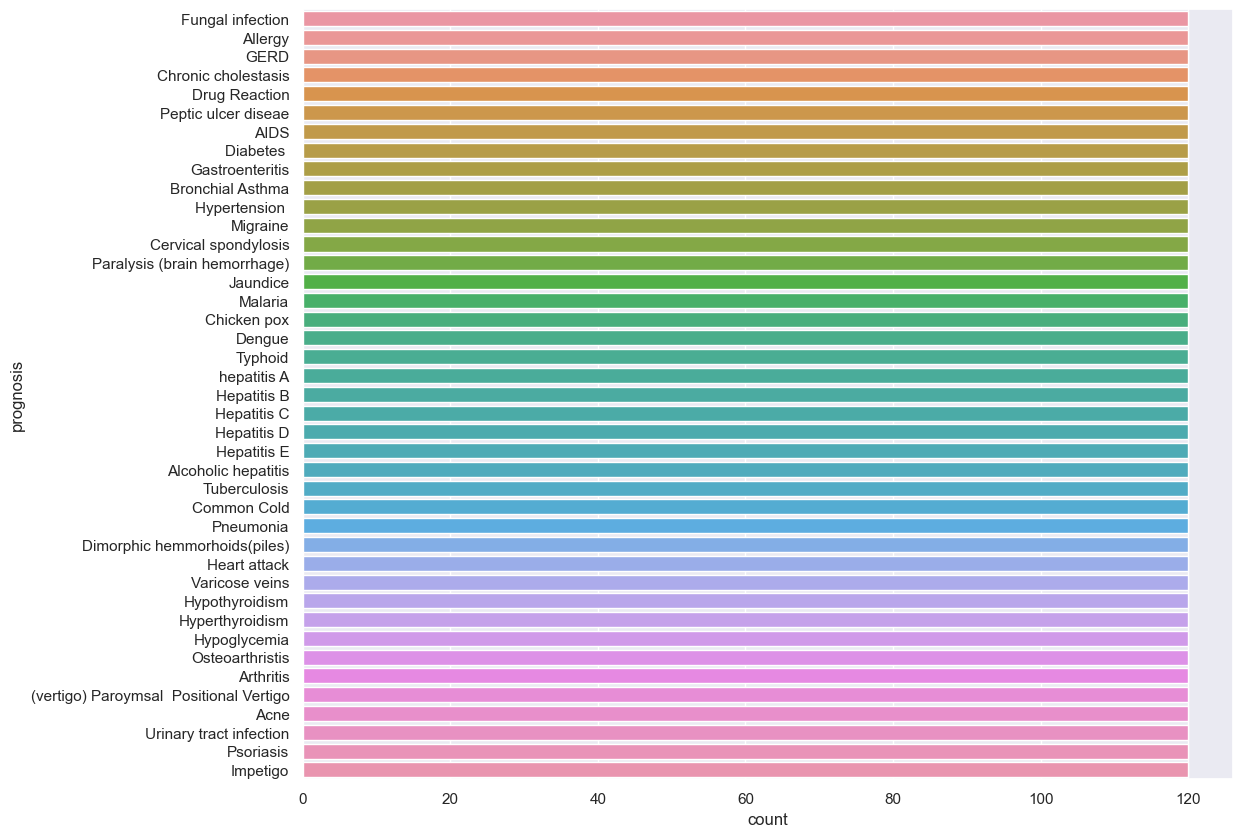

In [12]:

sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(y='prognosis',data=df)


We can observe that number of data values cooresponding to each disease type are same(120 in number) for all diseases. Hence the data is perfectly balanced and there is no need for extra effort for balancing data by using smote methods etc.

In [13]:
df_x=df.drop(['prognosis'],axis=1)
df_x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


<AxesSubplot:>

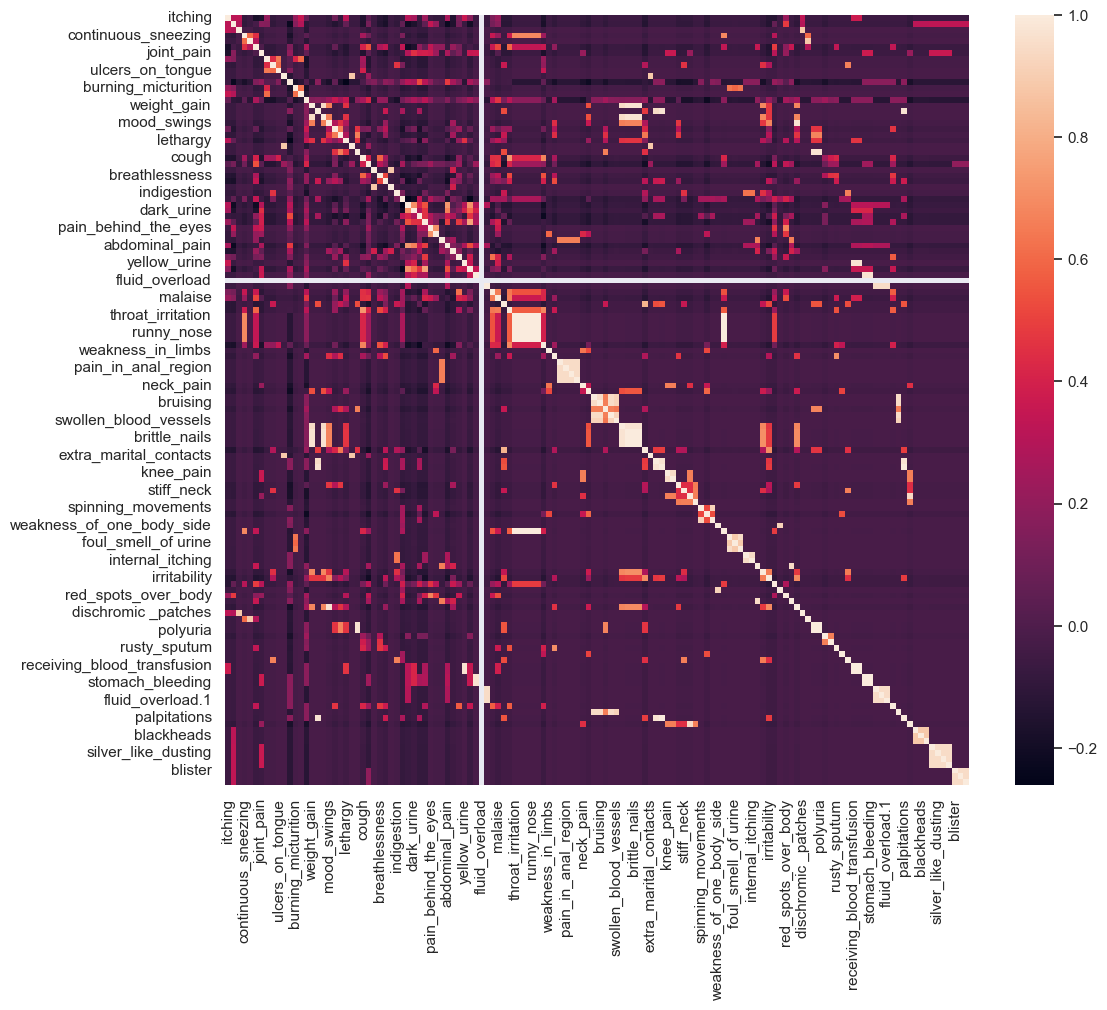

In [14]:

sns.heatmap(df_x.corr())

Here we can observe that features such as redness_of_eyes and runny_nose are highly correalted to an extent of correlation coeff 1. Hence we can employ feature selection by selective picking or use methods like pca to decrease the size of data to be fed to the model. Here we selectively remove features of high correlation(correlation greater than 0.95)

In [15]:
df_y=df['prognosis']
df_y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [16]:

X_train, X_test, y_train, y_test = train_test_split(df_x,np.array(df_y),test_size=0.2)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

24

In [19]:
corr_features

{'abnormal_menstruation',
 'belly_pain',
 'bloody_stool',
 'brittle_nails',
 'coma',
 'congestion',
 'enlarged_thyroid',
 'increased_appetite',
 'inflammatory_nails',
 'internal_itching',
 'irritation_in_anus',
 'loss_of_smell',
 'painful_walking',
 'palpitations',
 'polyuria',
 'puffy_face_and_eyes',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'redness_of_eyes',
 'runny_nose',
 'sinus_pressure',
 'slurred_speech',
 'stomach_bleeding',
 'swollen_extremeties'}

In [20]:
X_train.drop(corr_features,axis=1)
X1.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prominent_veins_on_calf,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,blister,red_sore_around_nose,yellow_crust_ooze
3644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2315,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
corr_features = correlation(X_test, 0.95)
len(set(corr_features))

32

In [22]:

model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'kernel': ['linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3],
            'max_depth':[25,30]
        }
    },
    'D_tree':{
        'model':tree.DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'Gaussian_nb':{
        'model':GaussianNB(),
        'params':{}
    },
}

In [23]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,1.000000,{'kernel': 'linear'}
1,random_forest,0.999238,"{'max_depth': 30, 'n_estimators': 3}"
2,D_tree,1.000000,{'criterion': 'gini'}
3,Gaussian_nb,1.000000,{}


In [24]:
clf.cv_results_

{'mean_fit_time': array([0.0125905]),
 'std_fit_time': array([0.00729215]),
 'mean_score_time': array([0.02317324]),
 'std_score_time': array([0.00783512]),
 'params': [{}],
 'split0_test_score': array([1.]),
 'split1_test_score': array([1.]),
 'split2_test_score': array([1.]),
 'split3_test_score': array([1.]),
 'split4_test_score': array([1.]),
 'mean_test_score': array([1.]),
 'std_test_score': array([0.]),
 'rank_test_score': array([1])}

In [25]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012591,0.007292,0.023173,0.007835,{},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [26]:

n_estimators = [1,2,3]
max_depth=[20,25,30]
avg_scores = {}
for kval in n_estimators:
    for cval in max_depth:
        cv_scores = cross_val_score(RandomForestClassifier(n_estimators=kval,max_depth=cval),X_train,y_train,cv=2)
        avg_scores[str(kval) +"_"+str(cval)] = np.average(cv_scores)

avg_scores

{'1_20': 0.7197662601626016,
 '1_25': 0.818089430894309,
 '1_30': 0.9270833333333334,
 '2_20': 0.9077743902439024,
 '2_25': 0.9697662601626016,
 '2_30': 0.96875,
 '3_20': 0.9705284552845528,
 '3_25': 0.9926321138211383,
 '3_30': 0.9933943089430894}

In [27]:
clf=GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
    
},cv=5, return_train_score=False)
clf.fit(X_train,y_train)
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196802,0.015451,0.130644,0.009511,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.073731,0.008555,0.015023,0.004093,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.094728,0.016723,0.035552,0.006979,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.066693,0.006004,0.012756,0.006415,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.112304,0.029801,0.034657,0.004669,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.087535,0.014849,0.013648,0.007899,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [28]:
clf=GridSearchCV(tree.DecisionTreeClassifier(),{
    'criterion':['gini','entropy']
    
},cv=5, return_train_score=False)
clf.fit(X_train,y_train)
df=pd.DataFrame(clf.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028562,0.007683,0.002536,0.000818,gini,{'criterion': 'gini'},1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1
1,0.012141,0.010598,0.002395,0.002519,entropy,{'criterion': 'entropy'},1.0,1.0,1.0,1.0,0.996188,0.999238,0.001525,2


In [29]:
clf=GridSearchCV(GaussianNB(),{},cv=5, return_train_score=False)
clf.fit(X_train,y_train)
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012123,0.002218,0.00971,0.001997,{},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [30]:
model=RandomForestClassifier(n_estimators=3,max_depth=30)

In [31]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=3)

In [32]:
model.score(X_train,y_train)

0.9969512195121951

In [33]:
model.score(X_test,y_test)

0.9939024390243902

In [34]:
pd.DataFrame(X1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
model.score(X1,df_y1)

0.9761904761904762

In [36]:
df1.join(pd.DataFrame(model.predict(X1),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [37]:
y_predicted=model.predict(X1)

In [38]:
cm=confusion_matrix(df_y1,y_predicted)

In [39]:
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Text(92.25, 0.5, 'Truth')

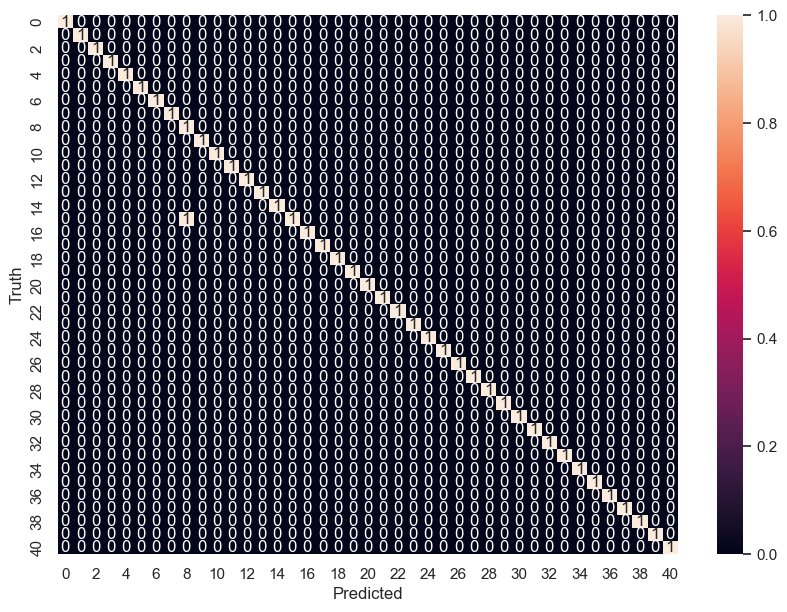

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")